In [6]:
# ---- Uncomment the following to run in colab, re-run this cell after installation -----
# try:
#   import decodanda
# except ImportError:
#   !pip install decodanda
#   print('\n\nInstalled Decodanda. Stopping RUNTIME. Colaboratory will restart automatically. Please run again.\n\n')
#   exit()


from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
np.random.seed(1123)
import matplotlib
matplotlib.rcParams['figure.dpi'] = 120
matplotlib.rcParams['figure.facecolor'] = 'w'
import warnings
warnings.filterwarnings('ignore')

from decodanda import Decodanda, generate_synthetic_data, visualize_synthetic_data



### First example: neurons respond to one variable
In this example, we have a simple scenario where neurons respond to a single binary variable that can take two values. We will try to decode these two values from neural activity.
In this toy example, we record two variables, ```stimulus``` and ```action```, but only one of them (```stimulus```) is represented in the neural response.


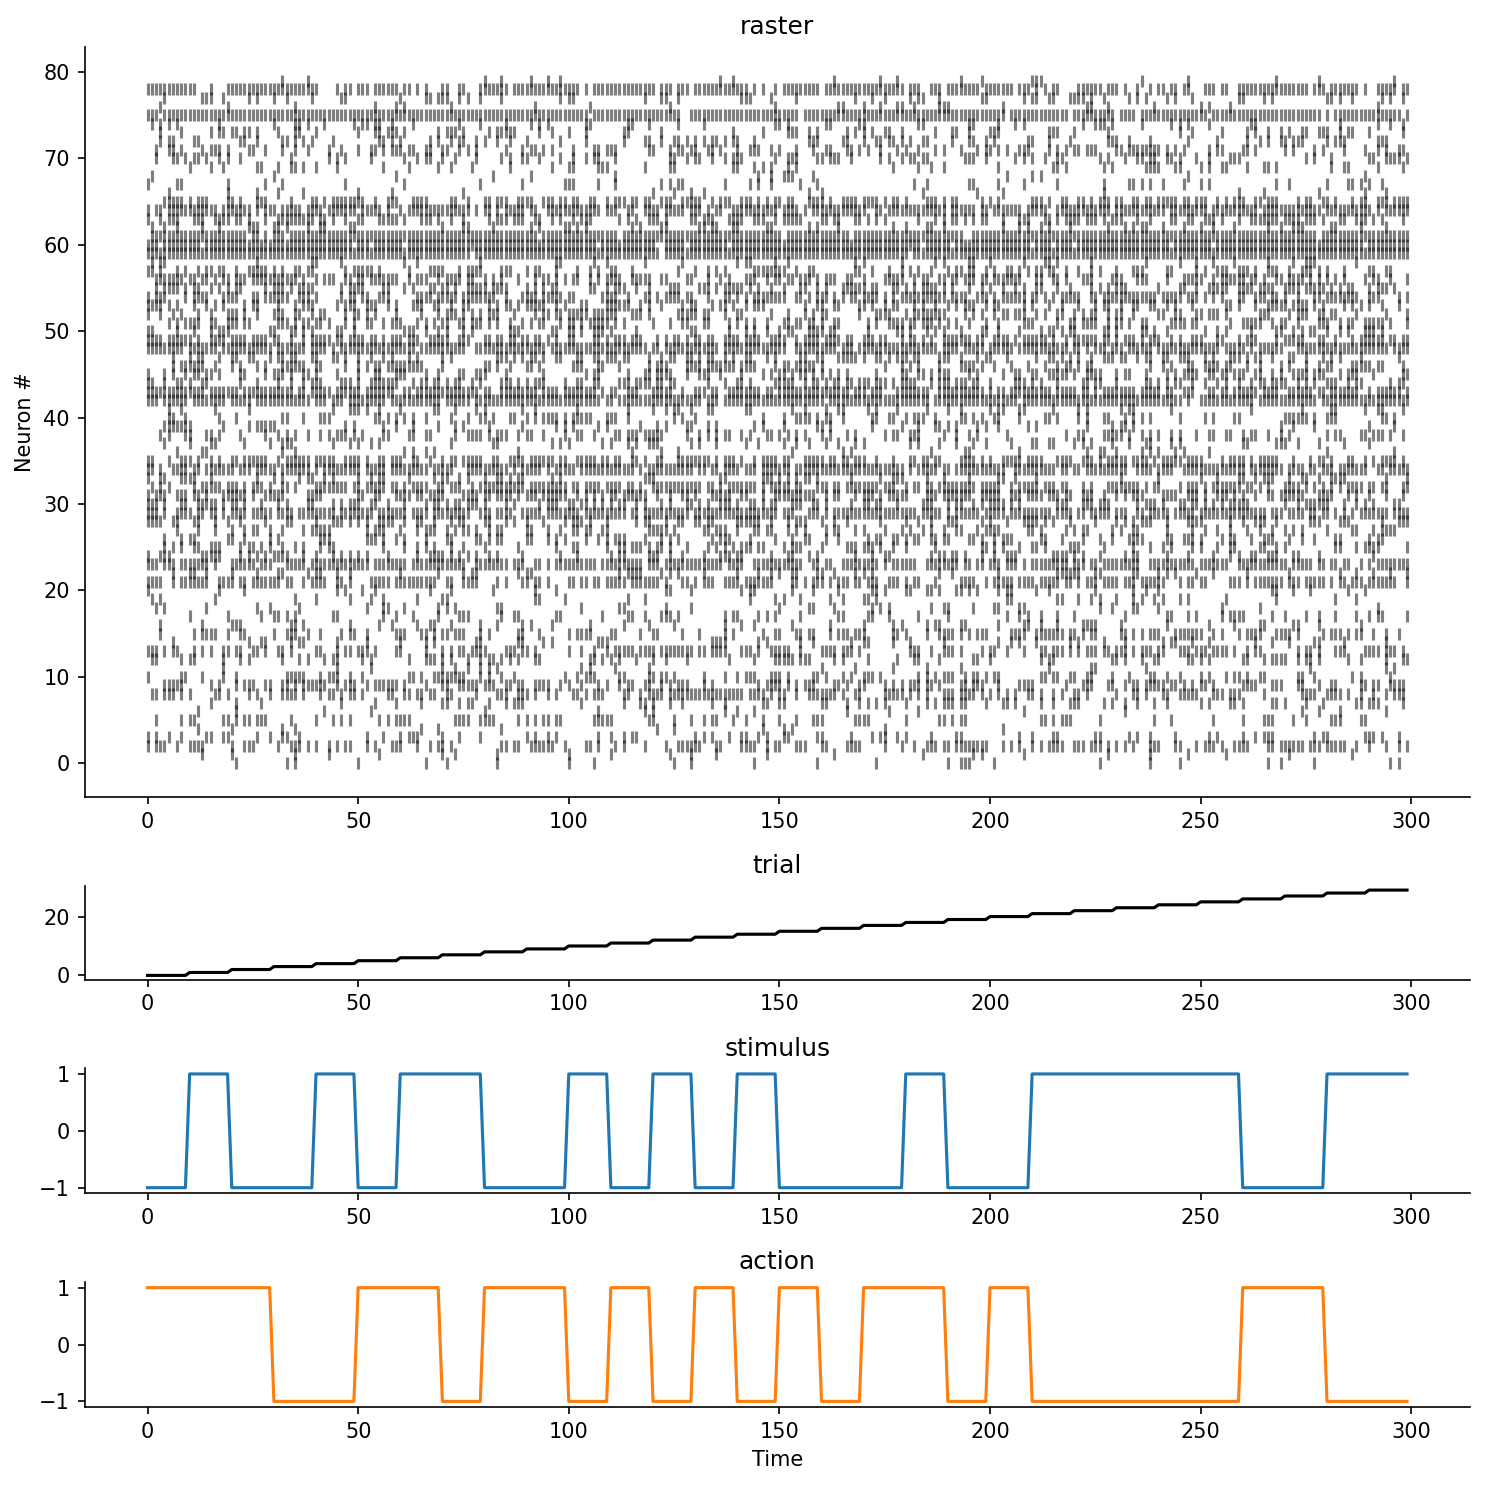

In [7]:
# let's create some data that responds to a binary variable

data = generate_synthetic_data(n_neurons=80, n_trials=30, keyA='stimulus', keyB='action', rateA=0.1, rateB=0, meanfr=0.05)
visualize_synthetic_data(data)


In [8]:
# Create a decodanda object by applying these conditions to the data

conditions = {'stimulus': [-1, 1]}     # The conditions dictionary takes a simple one-variable structure.
# variable name^     values^

mydec = Decodanda(data=data,
                  conditions=conditions,
                  verbose=True)

#### The decode() method

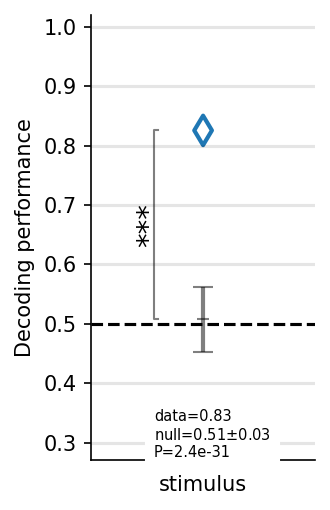

In [9]:
decoding_params = {
    'training_fraction': 0.7,       # fraction of trials used for training during cross validation
    'cross_validations': 10,        # number of different training-testing separations
    'nshuffles': 25,                # number of null model repetitions to compute significance
    'plot': True,                   # this generates a recap plot with performance, null model bars, and significance
}

data, null = mydec.decode(**decoding_params)



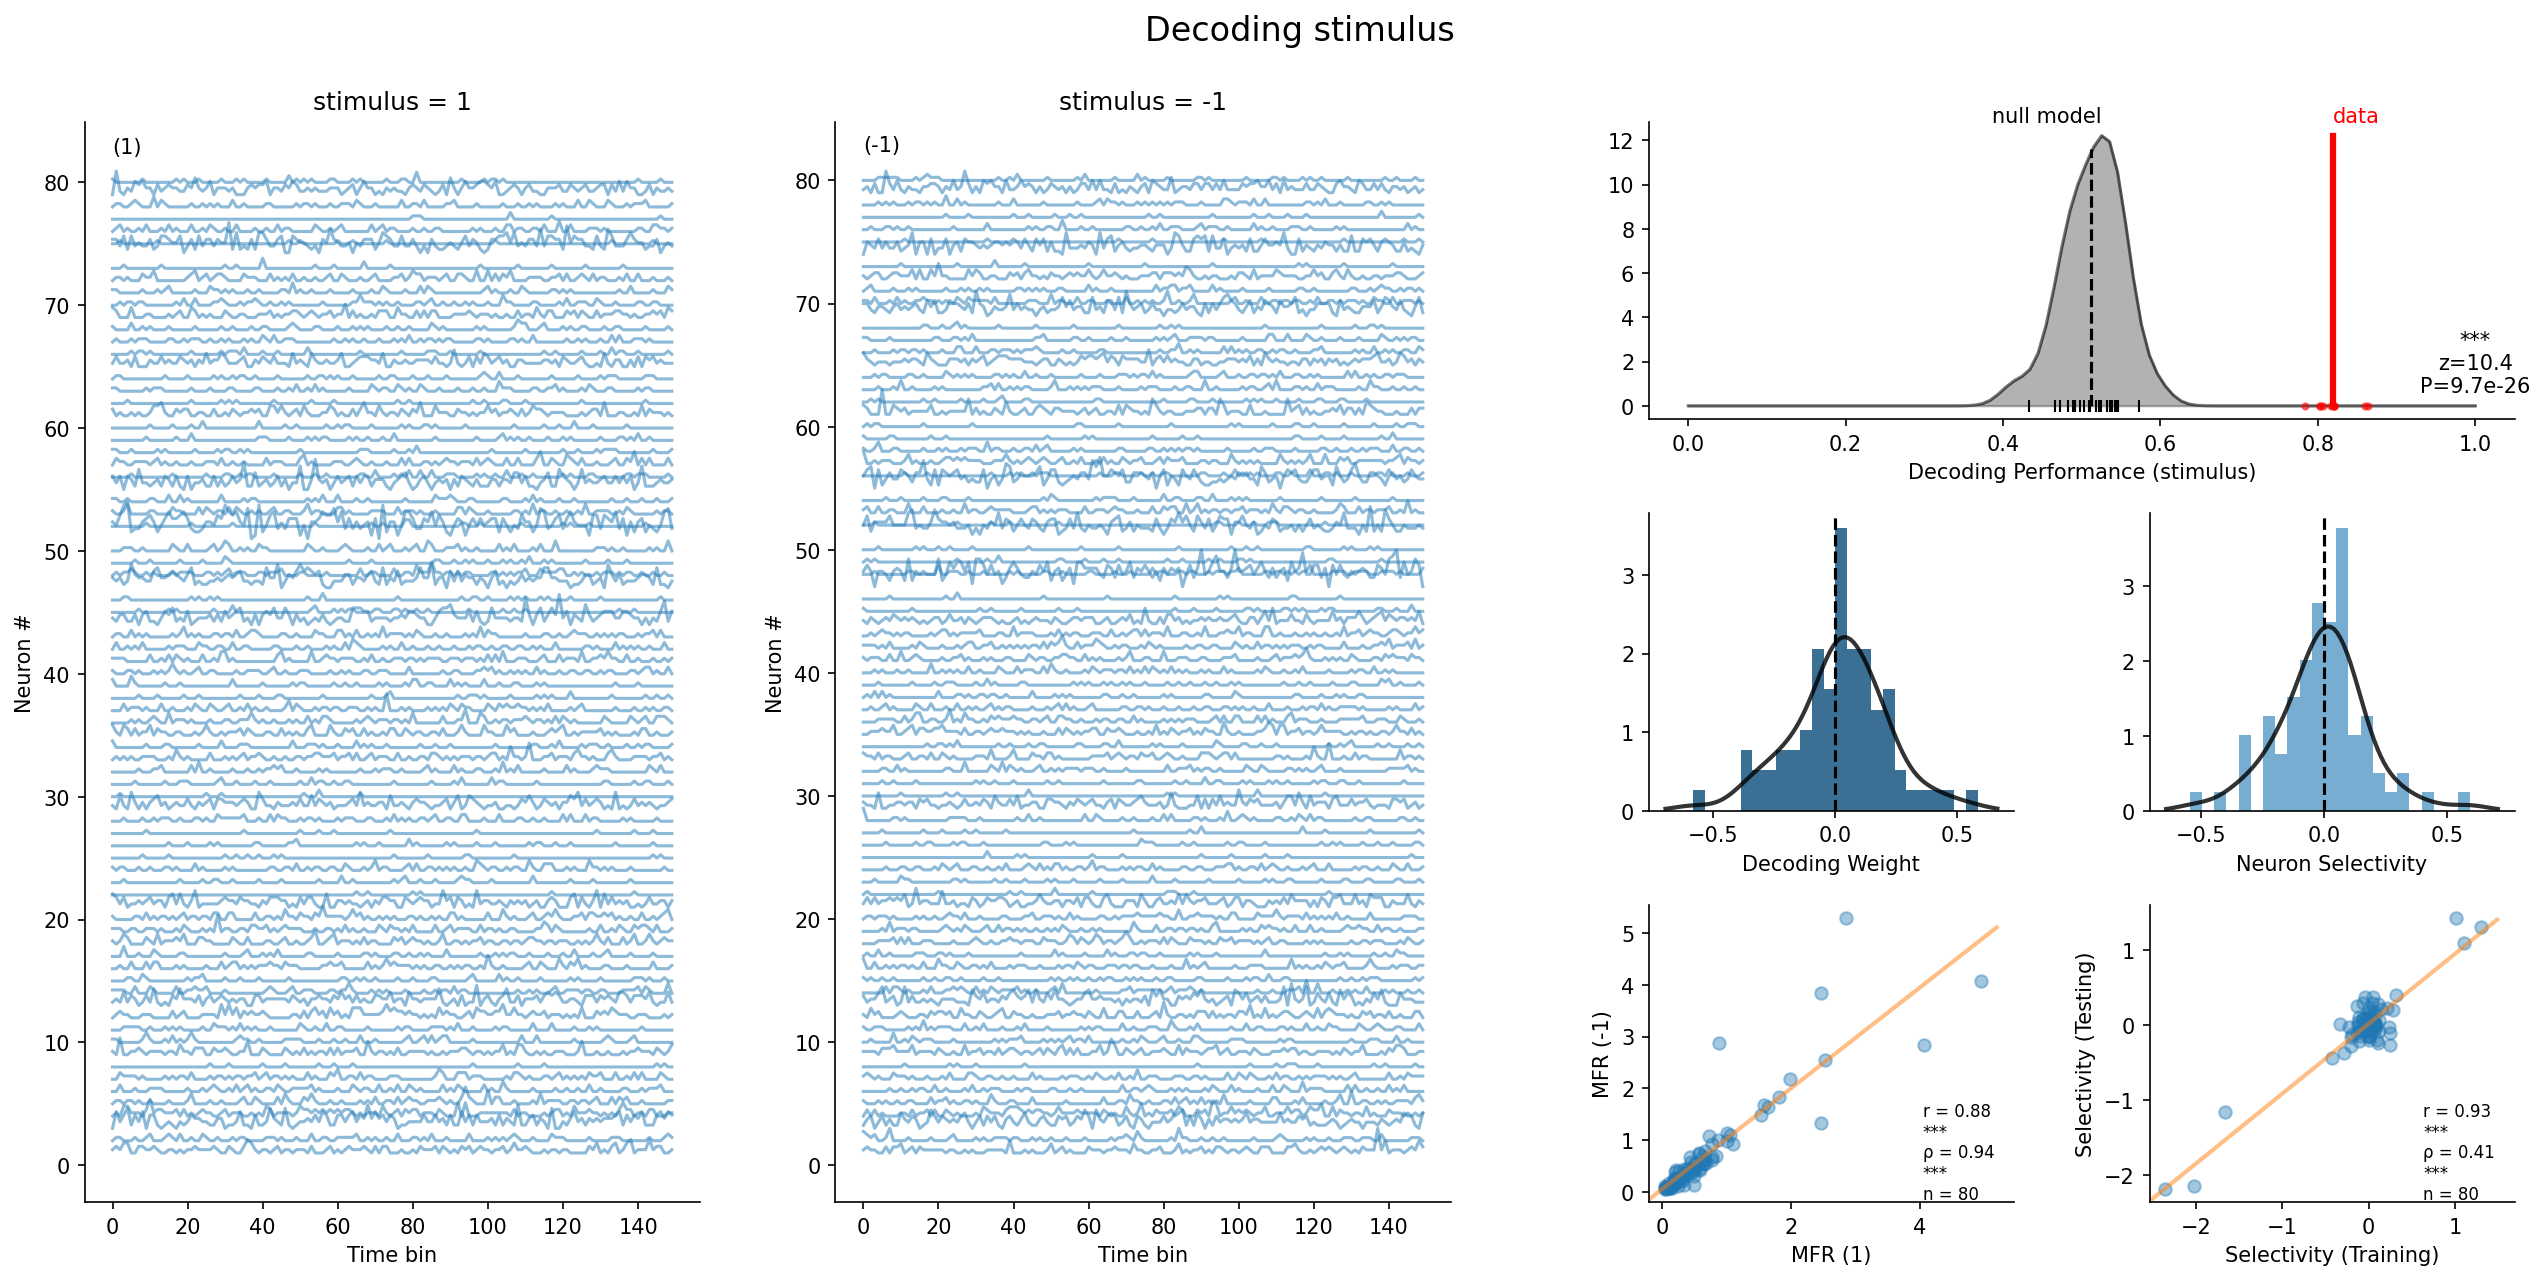

In [10]:
# with the key plot_all=True we can inspect the details of the analysis
mydec._verbose=False
decoding_params['plot_all'] = True
decoding_params['plot'] = False

data, null = mydec.decode(**decoding_params)